# Описание
Простейший пример ООП в Python, в которой присутствует интересная формула вычисления позиции точек на окне, которая рисовала некое подобие **водоворота**
$$\Huge
\begin{array}{l}
x\to x+\cos{\left(y\cdot\frac{\pi}{180}\right)};\\
y\to y+\sin{\left(x\cdot\frac{\pi}{180}\right)}.\\
\end{array}
$$

$$\Huge
z = \cos(y)+\sin(x)
$$

$$\Huge
\begin{array}{l}
x\to x+\cos{\left(y\cdot\frac{\pi}{180}\right)}+\dfrac{\cos{\left(3y\cdot\frac{\pi}{180}\right)}}{2};\\
y\to y+\sin{\left(x\cdot\frac{\pi}{180}\right)}+\dfrac{\sin{\left(3x\cdot\frac{\pi}{180}\right)}}{2};\\
\end{array}
$$

$$\Huge
z = \cos(y)+\dfrac{\cos(3\cdot y)}{2}+\sin(x)+\dfrac{\sin(3\cdot x)}{2}
$$

$$\Large
\begin{array}{l}
x\to x+(x-C_{x})\cdot(\cos(\alpha)-1)-(y-C_{y})\cdot\sin(\alpha)\\
y\to y+(x-C_{x})\cdot\sin(\alpha)+(y-C_{y})\cdot(\cos(\alpha)-1)
\end{array}
$$

$$\Huge
\begin{array}{l}
x\to x+\cos{\left(y\cdot\frac{\pi}{180}\right)}+0.6;\\
y\to y+\sin{\left(x\cdot\frac{\pi}{180}\right)}.\\
x\to 0, x>\text{width}
\end{array}
$$

In [1]:
import pygame as pg
from random import randint as rd
from math import sin, cos, radians, floor

pygame 2.6.1 (SDL 2.28.4, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
WIN_SIZE = (1024, 768)

In [3]:
class Particle():
    lst = []
    def __init__(self, pos, radius, color):
        self.pos = pos
        self.radius = radius
        self.color = color
        Particle.lst.append(self)
    def clear():
        Particle.lst = []    
    def generate(count = 10, width = 5):
        for i in range(count):
            Particle(
                [rd(0, WIN_SIZE[0]), rd(0, WIN_SIZE[1])],
                width,
                (rd(0, 255), rd(0, 255), rd(0, 255)),
            )
    def generateGrid(gridX = 50, gridY = 50, width = 5):
        for x in range(gridX + 1):
            for y in range(gridY + 1):
                Particle(
                        [
                            x * WIN_SIZE[0] / gridX, 
                            y * WIN_SIZE[1] / gridY
                        ],
                        width,
                        (
                            (gridY - y) * floor(256 / gridY), 
                            x * floor(256 / gridX), 
                            y * floor(256 / gridY)
                        )
                )
    def render(surf):
        for obj in Particle.lst:
            pg.draw.circle(surf, obj.color, obj.pos, obj.radius)
    def update():
        for obj in Particle.lst:
            obj.pos[0] += cos(radians(obj.pos[1]))
            obj.pos[1] += sin(radians(obj.pos[0]))
    def update2():
        for obj in Particle.lst:
            obj.pos[0] += cos(radians(obj.pos[1])) + 2 * cos(3*radians(obj.pos[1]))
            obj.pos[1] += sin(radians(obj.pos[0])) + 2 * sin(3*radians(obj.pos[0]))
    def update3():
        for obj in Particle.lst:
            obj.pos[0] += cos(radians(obj.pos[1])) + 4
            obj.pos[1] += sin(radians(obj.pos[0]))
            if obj.pos[0] > WIN_SIZE[0]: obj.pos[0] = 0
            if obj.pos[1] > WIN_SIZE[1]: obj.pos[1] = 0
            if obj.pos[0] < 0: obj.pos[0] = WIN_SIZE[0]
            if obj.pos[1] < 0: obj.pos[1] = WIN_SIZE[1]
    def update4():
        center = (WIN_SIZE[0]//2, WIN_SIZE[1]//2)
        # center = (0, 0)
        speed = 0.01
        for obj in Particle.lst:
            obj.pos[0] += (obj.pos[0]-center[0])*(cos(speed)-1)-(obj.pos[1]-center[1])*(sin(speed)  )
            obj.pos[1] += (obj.pos[0]-center[0])*(sin(speed)  )+(obj.pos[1]-center[1])*(cos(speed)-1)
            if obj.pos[0] > WIN_SIZE[0]: obj.pos[0] = 0
            if obj.pos[1] > WIN_SIZE[1]: obj.pos[1] = 0
            if obj.pos[0] < 0: obj.pos[0] = WIN_SIZE[0]
            if obj.pos[1] < 0: obj.pos[1] = WIN_SIZE[1]
            # if obj.pos[0] > WIN_SIZE[0]: obj.pos[0] = 0

In [5]:
root = pg.display.set_mode(WIN_SIZE)
clk = pg.time.Clock()
run = True

fade = pg.Surface(WIN_SIZE, pg.SRCALPHA)
fade.fill((0,0,0))
fade.set_alpha(10)

Particle.clear()
Particle.generateGrid(gridX = 50, gridY = 50, width = 4)

while run:
    for event in pg.event.get():
        if event.type == pg.QUIT or (event.type == pg.KEYDOWN and event.key == pg.K_ESCAPE):
            run = False
        # if event.type == pg.KEYDOWN and event.key == pg.K_SPACE:
        #     pg.image.save(root, "WhirlpoolScreenShot2.png")

    Particle.render(root)
    Particle.update()
    root.blit(fade, (0,0))

    # for i in range(10):
    #     pg.draw.line(root, (255,255,255),
    #                 (0,90*i), (WIN_SIZE[0],90*i))
    #     pg.draw.line(root, (255,255,255),
    #                 (90*i,0), (90*i,WIN_SIZE[1]))

    pg.display.flip()
    clk.tick(60)
pg.quit()

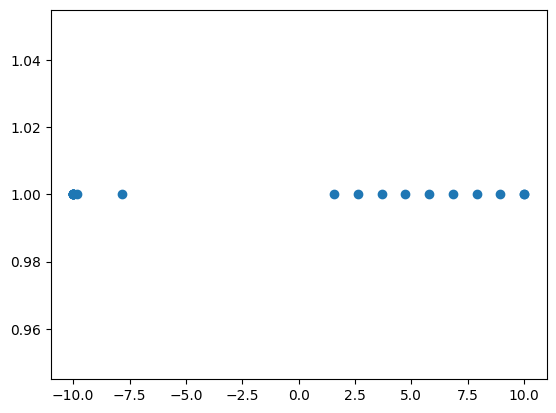

[-10.         -10.         -10.         -10.          -9.99999991
  -9.99999046  -9.99956126  -9.98882908  -9.81553256  -7.81162022
  10.           1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
def custom_linspace(start, end, num_points, divergence_coefficient=0):
    # Генерируем базовый массив с равномерной разницей
    base_array = np.linspace(start, end, num_points)

    # Изменяем массив для достижения желаемого распределения
    mid_index = num_points // 2
    for i in range(mid_index):
        t = i / mid_index
        base_array[i] = start + (end - start) * (t ** (1 + divergence_coefficient))
    for i in range(mid_index, num_points):
        t = (num_points - i) / mid_index
        base_array[num_points-i] = start + (end - start) * (t ** (1 + divergence_coefficient))

    # Убедимся, что крайние значения включены
    base_array[0] = start
    base_array[-1] = end

    return base_array
n = 10  # Задаем значение n
num_points = 20  # Количество точек в массиве
divergence_coefficient = 20  # Коэффициент расхождения
result_array = custom_linspace(-n, n, num_points, divergence_coefficient)
y = np.ones((1, num_points))
plt.scatter(result_array,y)
plt.show()

print(result_array)

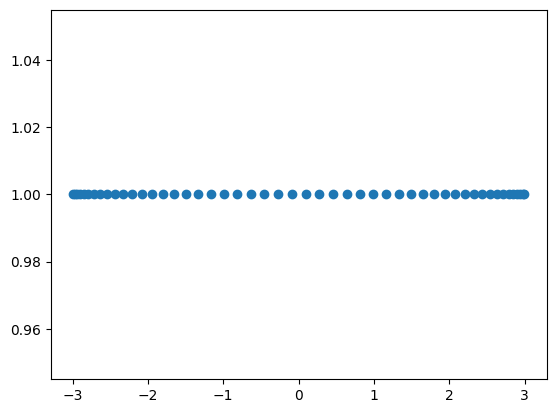

[-2.99248496 -2.97389371 -2.94415848 -2.9033907  -2.85174315 -2.78940934
 -2.71662288 -2.6336565  -2.54082111 -2.43846458 -2.32697047 -2.20675659
 -2.07827339 -1.94200235 -1.79845411 -1.64816658 -1.49170293 -1.32964946
 -1.16261345 -0.99122081 -0.8161138  -0.6379486  -0.45739283 -0.27512309
 -0.09182239  0.09182239  0.27512309  0.45739283  0.6379486   0.8161138
  0.99122081  1.16261345  1.32964946  1.49170293  1.64816658  1.79845411
  1.94200235  2.07827339  2.20675659  2.32697047  2.43846458  2.54082111
  2.6336565   2.71662288  2.78940934  2.85174315  2.9033907   2.94415848
  2.97389371  2.99248496]


In [8]:
import numpy as np
import matplotlib.pyplot as plt

count = 50
x = np.linspace(-3, 3, count)
y = np.ones((1, count))
xp = 3*np.sin(x/2)
# xp = np.e**(-5*x**2)
plt.scatter(xp,y)
plt.show()
print(xp)
# print(y)

[[ 2.87677282  2.91588654  2.94763864 ... -2.94763864 -2.91588654
  -2.87677282]
 [ 2.87677282  2.91588654  2.94763864 ... -2.94763864 -2.91588654
  -2.87677282]
 [ 2.87677282  2.91588654  2.94763864 ... -2.94763864 -2.91588654
  -2.87677282]
 ...
 [ 2.87677282  2.91588654  2.94763864 ... -2.94763864 -2.91588654
  -2.87677282]
 [ 2.87677282  2.91588654  2.94763864 ... -2.94763864 -2.91588654
  -2.87677282]
 [ 2.87677282  2.91588654  2.94763864 ... -2.94763864 -2.91588654
  -2.87677282]]


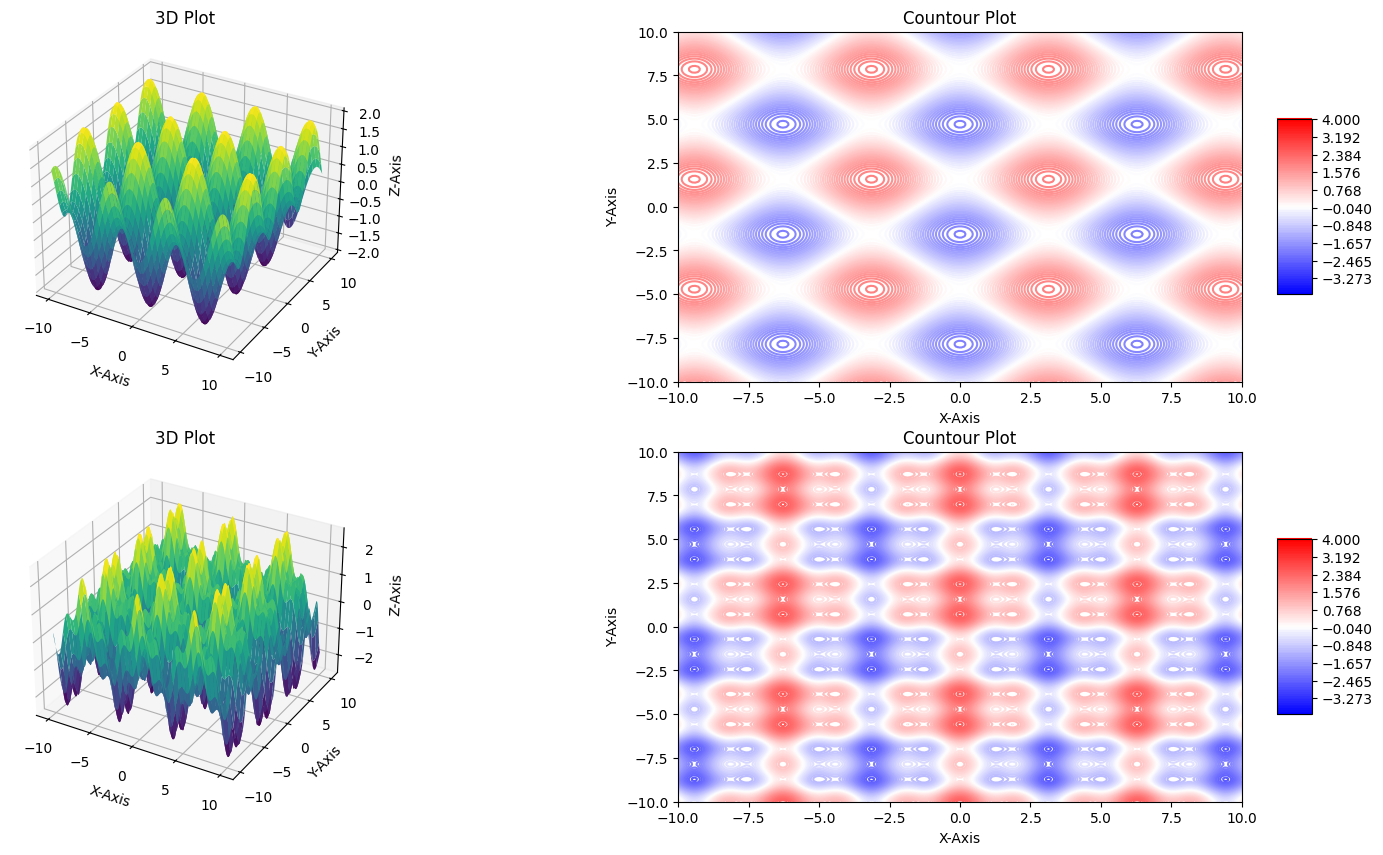

In [9]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
x, y = np.meshgrid(x, y)
# z = np.cos(y)+np.cos(3*y)/2+np.sin(x)+np.sin(3*x)/2
z1 = np.cos(x+np.pi)+np.sin(y)
z2 = np.cos(x)+np.cos(3*x)/2+np.sin(y)+np.sin(3*y)/2
z3 = np.sin(x+np.pi/2)+np.sin(3*x+np.pi/2)/2+np.sin(y)+np.sin(3*y)/2
# z = np.cos(x)+np.sin(y)
count=100
l = np.linspace(-4, 4, count)
lp = 3*np.sin(x/2)
print(lp)
colormap = 'bwr'
# colormap = 'coolwarm'
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(221, projection='3d')
ax.plot_surface(x,y, z1, cmap='viridis')
ax.set_title('3D Plot')
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')


ax2 = fig.add_subplot(222)
contour = ax2.contour(x,y,z1, levels=l,  cmap=colormap)
fig.colorbar(contour, ax=ax2, shrink=0.5, aspect=5)
ax2.set_title('Countour Plot')
ax2.set_xlabel('X-Axis')
ax2.set_ylabel('Y-Axis')

ax = fig.add_subplot(223, projection='3d')
ax.plot_surface(x,y, z2, cmap='viridis')
ax.set_title('3D Plot')
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')

ax2 = fig.add_subplot(224)
contour = ax2.contour(x,y,z3, levels=l,  cmap=colormap)
fig.colorbar(contour, ax=ax2, shrink=0.5, aspect=5)
ax2.set_title('Countour Plot')
ax2.set_xlabel('X-Axis')
ax2.set_ylabel('Y-Axis')

# plt.tight_layout()

plt.show()

![1](WhirlpoolScreenShot.png)
![2](WhirlpoolScreenShot2.png)